## Chapter 10: 8 Puzzle
### Qiskit 1.3


For  $8$-puzzle, there are $9$   different objects: eight cells and one empty cell. Each object has to be represented by four $4$ qubits since $3$ qubits allow only to represent $2^3=8$ different states.
The object $1$  is represented by $001$,  $2$  is represented by $010$ and  $3$  is represented by $011$, and we continue the representation as binary numbers with $8$ represented as $1000$. We represent the empty space $x$   by $1111$. The~state is represented by 36 qubits  $x_{0}, x_{1}, x_{2}, x_{3}, x_{4}, x_{5}, x_{6}, x_{7}, \cdots, x_{35}$.

The empty cell can be present in $9$ different positions. The~empty cell  can move either  up, down, left or right.   The new board configuration is determined by the function $p$.  The~input of the function $p$ is the current board configuration and two bits\mbox{ $m=m_1, m_2$} (qubits $46$ and $47$) indicating whether the blank cell should perform move  right $(m=0=|00 \rangle)$, left $(m=1=|01 \rangle)$, up $(m=2=|10\rangle)$ or  down $(m=3=|11\rangle)$. There are $36$ qubits to represent the state and $9$ qubits for the trace, together with the auxiliary qubit $49$ qubits are represented by the quantum circuit. 

In [10]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram, plot_state_hinton, plot_bloch_multivector
from qiskit.visualization import plot_distribution 
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate

In the case  the empty cell is in the center, four movements are possible. For a cell in the edge only three movements are possible, for the corner only two movements are possible

In [11]:
def if_rules():
    qc = QuantumCircuit(46)
    #Marke the trace indicate the rule group through trace
    gate = MCXGate(4)
    #Empty Space in corner, 2 movements
    qc.append(gate, [0, 1, 2, 3, 37])  
    #Empty Space in edge, 3 movements
    qc.append(gate, [4, 5, 6, 7, 38])
    #Empty Space in corner, 2 movements
    qc.append(gate, [8, 9, 10, 11, 39])
    #Empty Space in edge, 3 movements
    qc.append(gate, [12, 13, 14, 15, 40])
    #Empty Space in center, 4 movements
    qc.append(gate, [16, 17, 18, 19, 41])
    #Empty Space in edge, 3 movements
    qc.append(gate, [20, 21, 22, 23, 42])
    #Empty Space in corner, 2 movements
    qc.append(gate, [24, 25, 26, 27, 43])
     #Empty Space in edge, 3 movements
    qc.append(gate, [28, 29, 30, 31, 44])
    #Empty Space in corner, 2 movements
    qc.append(gate, [32, 33, 34, 35, 45])
    
    qc.name="IF"
    return qc

For the empty space in the center there are four instantiations corresponding to the four movemen

In [12]:
def rules1():


    qc = QuantumCircuit(48)
    #Depth1
    #Flag 36
    #Path Descriptor 46, 47
    #Trace 37-45
    
    flag_gate = MCXGate(3)

    #In the center  qc.append(gate, [16, 17, 18, 19, 41])

    #If then rule (c 1) right, for empty at 16, 17, 18, 19  -> 12, 13, 14, 15
    
    qc.append(flag_gate, [41, 46, 47, 36])

    #Move

    qc.cswap(36,16,12)
    qc.cswap(36,17,13)
    qc.cswap(36,18,14)
    qc.cswap(36,19,15)

    #Clear Flag

    qc.append(flag_gate, [41, 46, 47, 36])

    #If then rule (c 2) left, for empty at 16, 17, 18, 19  -> 20, 21, 22, 23

    qc.x(46)

    qc.append(flag_gate, [41, 46, 47, 36])

    #Move

    qc.cswap(36,16,20)
    qc.cswap(36,17,21)
    qc.cswap(36,18,22)
    qc.cswap(36,19,23)

    #Clear Flag

    qc.append(flag_gate, [41, 46, 47, 36])
    
    qc.x(46)
   
    #If then rule (c 3) up, for empty at 16, 17, 18, 19  -> 28, 29, 30, 31

    qc.x(47)

    qc.append(flag_gate, [41, 46, 47, 36])

    #Move

    qc.cswap(36,16,28)
    qc.cswap(36,17,29)
    qc.cswap(36,18,30)
    qc.cswap(36,19,31)

    #Clear Flag

    qc.append(flag_gate, [41, 46, 47, 36])
    
    qc.x(47)

    #If then rule (c 4) down, for empty at 16, 17, 18, 19  -> 4, 5, 6, 7
    
    qc.x(46)
    qc.x(47)

    qc.append(flag_gate, [41, 46, 47, 36])

    #Move

    qc.cswap(36,16,4)
    qc.cswap(36,17,5)
    qc.cswap(36,18,6)
    qc.cswap(36,19,7)

    #Clear Flag

    qc.append(flag_gate, [41, 46, 47, 36])
    
    qc.x(47)
    qc.x(46)

    qc.name="R1"
    return qc

In [13]:
def rules1_inv():
    qc=rules1()
    qc_inv=qc.inverse()
    qc_inv.name="R1†"
    return qc_inv

In [14]:
def rules2():
    qc = QuantumCircuit(48)
    #Depth1
    #Flag 36
    #Path Descriptor 46, 47
    #Trace 37-45
    
    flag_gate = MCXGate(3)

    #Rules in the middle

    #2th type

    #qc.append(gate, [12, 13, 14, 15, 40])
    
    #If then rule (c 1) up, for empty at 12, 13, 14, 15  -> 24, 25, 26, 27

    qc.append(flag_gate, [40, 46, 47, 36])

    #Move

    qc.cswap(36,12,24)
    qc.cswap(36,13,25)
    qc.cswap(36,14,26)
    qc.cswap(36,15,27)

    #Clear Flag

    qc.append(flag_gate, [40, 46, 47, 36])


    #If then rule (c 2) down, for empty at 12, 13, 14, 15  -> 0, 1, 2, 3
   
    qc.x(46)
    qc.append(flag_gate, [40, 46, 47, 36])

    #Move

    qc.cswap(36,12,0)
    qc.cswap(36,13,1)
    qc.cswap(36,14,2)
    qc.cswap(36,15,3)


    #Clear Flag

    qc.append(flag_gate, [40, 46, 47, 36])
    qc.x(46)

    #If then rule (c 3) left, for empty at 12, 13, 14, 15  -> 16, 17, 18, 19


    qc.x(47)
    qc.append(flag_gate, [40, 46, 47, 36])

    #Move

    qc.cswap(36,12,16)
    qc.cswap(36,13,17)
    qc.cswap(36,14,18)
    qc.cswap(36,15,19)


    #Clear Flag

    qc.append(flag_gate, [40, 46, 47, 36])
    qc.x(47)

    #Again
    qc.x(46)
    qc.x(47)
    qc.append(flag_gate, [40, 46, 47, 36])

    #Move

    qc.cswap(36,12,16)
    qc.cswap(36,13,17)
    qc.cswap(36,14,18)
    qc.cswap(36,15,19)


    #Clear Flag

    qc.append(flag_gate, [40, 46, 47, 36])
    qc.x(47)
    qc.x(46)


    qc.name="R2"
    return qc

In [15]:
def rules2_inv():
    qc=rules2()
    qc_inv=qc.inverse()
    qc_inv.name="R2†"
    return qc_inv

In [16]:
def if_rules_inv():
    qc=if_rules()
    qc_inv=qc.inverse()
    qc_inv.name="IF†"
    return qc_inv

In [17]:
def oracle():
    qc = QuantumCircuit(49)
    gate = MCXGate(4)
    #The Position of the Blank
    #Four possible goals after moving the space from the center for depth one
      
    #qc.append(gate, [12, 13, 14, 15, 48])
    #qc.append(gate, [4, 5, 6, 7, 48])
    #qc.append(gate, [20, 21, 22, 23, 48])
    qc.append(gate, [28, 29, 30, 31, 48])

    qc.name="O"
    return qc

In [18]:
def Grover():

    qc = QuantumCircuit(48)
    #Diffusor
    qc.h([46,47])
    qc.z([46,47])
    qc.cz(46,47)
    qc.h([46,47])

    qc.name="G"
    return qc


In [19]:
qc = QuantumCircuit(49,2)

#State Preparation 0-35

#N3
qc.x(0)
qc.x(1)
#2
#3

#N2
#4
qc.x(5)
#6
#7

#N1
qc.x(8)
#9
#10
#11

#N5
qc.x(12)
#13
qc.x(14)
#15

#NX
qc.x(16)
qc.x(17)
qc.x(18)
qc.x(19)

#N4
#20
#21
qc.x(22)
#23

#N6
#24
qc.x(25)
qc.x(26)
#27

#N8
#28
#29
#30
qc.x(31)

#N7
qc.x(32)
qc.x(33)
qc.x(34)
#35



#Working Memory, Flag 36

#1St Trace 37-45

#1St Descriptor in superposition 46, 47

qc.h(46)
qc.h(47)

#Preparation of Aux
qc.x(48)
qc.h(48)


qc.barrier()



qc.append(if_rules(),range(46))
qc.append(rules1(),range(48))
#Oracle
qc.append(oracle(),range(49))

qc.append(rules1_inv(),range(48))
qc.append(if_rules_inv(),range(46))

#Clear Input

qc.barrier()

#State Preparation 0-35

#N3
qc.x(0)
qc.x(1)
#2
#3

#N2
#4
qc.x(5)
#6
#7

#N1
qc.x(8)
#9
#10
#11

#N5
qc.x(12)
#13
qc.x(14)
#15

#NX
qc.x(16)
qc.x(17)
qc.x(18)
qc.x(19)

#N4
#20
#21
qc.x(22)
#23

#N6
#24
qc.x(25)
qc.x(26)
#27

#N8
#28
#29
#30
qc.x(31)

#N7
qc.x(32)
qc.x(33)
qc.x(34)
#35



qc.h(48)

qc.append(Grover(),range(48))

qc.measure(46,0)
qc.measure(47,1)


qc.draw(fold=140)

┌───┐      ░ ┌──────┐┌──────┐┌─────┐┌───────┐┌───────┐ ░ ┌───┐┌─────┐      
 q_0: ┤ X ├──────░─┤0     ├┤0     ├┤0    ├┤0      ├┤0      ├─░─┤ X ├┤0    ├──────
      ├───┤      ░ │      ││      ││     ││       ││       │ ░ ├───┤│     │      
 q_1: ┤ X ├──────░─┤1     ├┤1     ├┤1    ├┤1      ├┤1      ├─░─┤ X ├┤1    ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
 q_2: ───────────░─┤2     ├┤2     ├┤2    ├┤2      ├┤2      ├─░──────┤2    ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
 q_3: ───────────░─┤3     ├┤3     ├┤3    ├┤3      ├┤3      ├─░──────┤3    ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
 q_4: ───────────░─┤4     ├┤4     ├┤4    ├┤4      ├┤4      ├─░──────┤4    ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
 q_5: ┤ X ├──────░─┤5     ├┤5     ├┤5    ├┤5      ├┤5      ├─░─┤ X ├┤5    ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
 q_6: ───────────░─┤6     ├┤6     ├┤6    ├┤6      ├┤6      ├─░──────┤6    ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
 q_7: ───────────░─┤7     ├┤7     ├┤7    ├┤7      ├┤7      ├─░──────┤7    ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
 q_8: ┤ X ├──────░─┤8     ├┤8     ├┤8    ├┤8      ├┤8      ├─░─┤ X ├┤8    ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
 q_9: ───────────░─┤9     ├┤9     ├┤9    ├┤9      ├┤9      ├─░──────┤9    ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
q_10: ───────────░─┤10    ├┤10    ├┤10   ├┤10     ├┤10     ├─░──────┤10   ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
q_11: ───────────░─┤11    ├┤11    ├┤11   ├┤11     ├┤11     ├─░──────┤11   ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
q_12: ┤ X ├──────░─┤12    ├┤12    ├┤12   ├┤12     ├┤12     ├─░─┤ X ├┤12   ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
q_13: ───────────░─┤13    ├┤13    ├┤13   ├┤13     ├┤13     ├─░──────┤13   ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
q_14: ┤ X ├──────░─┤14    ├┤14    ├┤14   ├┤14     ├┤14     ├─░─┤ X ├┤14   ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
q_15: ───────────░─┤15    ├┤15    ├┤15   ├┤15     ├┤15     ├─░──────┤15   ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
q_16: ┤ X ├──────░─┤16    ├┤16    ├┤16   ├┤16     ├┤16     ├─░─┤ X ├┤16   ├──────
      ├───┤      ░ │      ││      ││     ││       ││       │ ░ ├───┤│     │      
q_17: ┤ X ├──────░─┤17    ├┤17    ├┤17   ├┤17     ├┤17     ├─░─┤ X ├┤17   ├──────
      ├───┤      ░ │      ││      ││     ││       ││       │ ░ ├───┤│     │      
q_18: ┤ X ├──────░─┤18    ├┤18    ├┤18   ├┤18     ├┤18     ├─░─┤ X ├┤18   ├──────
      ├───┤      ░ │      ││      ││     ││       ││       │ ░ ├───┤│     │      
q_19: ┤ X ├──────░─┤19    ├┤19    ├┤19   ├┤19     ├┤19     ├─░─┤ X ├┤19   ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
q_20: ───────────░─┤20    ├┤20    ├┤20   ├┤20     ├┤20     ├─░──────┤20   ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
q_21: ───────────░─┤21    ├┤21    ├┤21   ├┤21     ├┤21     ├─░──────┤21   ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
q_22: ┤ X ├──────░─┤22    ├┤22    ├┤22   ├┤22     ├┤22     ├─░─┤ X ├┤22   ├──────
      └───┘      ░ │   IF ││      ││     ││       ││   IF† │ ░ └───┘│     │      
q_23: ───────────░─┤23    ├┤23    ├┤23   ├┤23     ├┤23     ├─░──────┤23   ├──────
                 ░ │      ││   R1 ││     ││   R1† ││       │ ░      │ 

The quantum circuit for the 9-puzzle task of the depth search 1. The empty space is in the center and the desired state  is represented by the empty space at top.  Simulating $49$ qubits requires higher memory capacity, we cannot use the statevector simulator or a search depth of two due to memory constraints. The path descriptor has four possible states represented by two qubits and is measured  after  applying the function $rules1$, which corresponds in moving the empty space up.


Total count are: {'01': 1024}


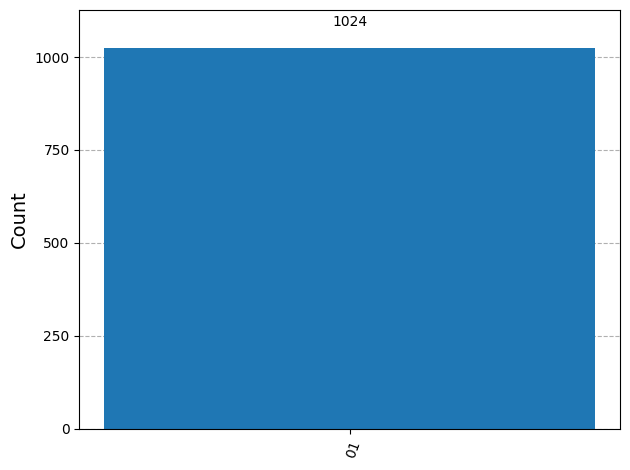

In [20]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

Now we change the desired state in the oracle which will marked two state (out of four states...)

In [21]:
def oracle():
    qc = QuantumCircuit(49)
    gate = MCXGate(4)
     
    #The Position of the Blank, three possible movements
     
    #qc.append(gate, [24, 25, 26, 27, 48])
    #qc.append(gate, [0, 1, 2, 3, 48])
    qc.append(gate, [16, 17, 18, 19, 48])
    
    qc.name="O"
    return qc

and apply applying the function $rules2$

In [22]:
qc = QuantumCircuit(49,2)

#State Preparation 0-35

#N3
qc.x(0)
qc.x(1)
#2
#3

#N2
#4
qc.x(5)
#6
#7

#N1
qc.x(8)
#9
#10
#11

#N5
qc.x(12)
qc.x(13)
qc.x(14)
qc.x(15)

#NX
qc.x(16)
#qc.x(17)
qc.x(18)
#qc.x(19)

#N4
#20
#21
qc.x(22)
#23

#N6
#24
qc.x(25)
qc.x(26)
#27

#N8
#28
#29
#30
qc.x(31)

#N7
qc.x(32)
qc.x(33)
qc.x(34)
#35



#Working Memory, Flag 36

#1St Trace 37-45

#1St Descriptor in superposition 46, 47

qc.h(46)
qc.h(47)

#Preparation of Aux
qc.x(48)
qc.h(48)


qc.barrier()



qc.append(if_rules(),range(46))
qc.append(rules2(),range(48))
#Oracle
qc.append(oracle(),range(49))
qc.append(rules2_inv(),range(48))
qc.append(if_rules_inv(),range(46))


#Clear Input

qc.barrier()

#State Preparation 0-35 clear

#N3
qc.x(0)
qc.x(1)
#2
#3

#N2
#4
qc.x(5)
#6
#7

#N1
qc.x(8)
#9
#10
#11

#N5
qc.x(12)
qc.x(13)
qc.x(14)
qc.x(15)

#NX
qc.x(16)
#qc.x(17)
qc.x(18)
#qc.x(19)

#N4
#20
#21
qc.x(22)
#23

#N6
#24
qc.x(25)
qc.x(26)
#27

#N8
#28
#29
#30
qc.x(31)

#N7
qc.x(32)
qc.x(33)
qc.x(34)
#35


qc.h(48)

qc.append(Grover(),range(48))

qc.measure(46,0)
qc.measure(47,1)


qc.draw(fold=140)


┌───┐      ░ ┌──────┐┌──────┐┌─────┐┌───────┐┌───────┐ ░ ┌───┐┌─────┐      
 q_0: ┤ X ├──────░─┤0     ├┤0     ├┤0    ├┤0      ├┤0      ├─░─┤ X ├┤0    ├──────
      ├───┤      ░ │      ││      ││     ││       ││       │ ░ ├───┤│     │      
 q_1: ┤ X ├──────░─┤1     ├┤1     ├┤1    ├┤1      ├┤1      ├─░─┤ X ├┤1    ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
 q_2: ───────────░─┤2     ├┤2     ├┤2    ├┤2      ├┤2      ├─░──────┤2    ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
 q_3: ───────────░─┤3     ├┤3     ├┤3    ├┤3      ├┤3      ├─░──────┤3    ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
 q_4: ───────────░─┤4     ├┤4     ├┤4    ├┤4      ├┤4      ├─░──────┤4    ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
 q_5: ┤ X ├──────░─┤5     ├┤5     ├┤5    ├┤5      ├┤5      ├─░─┤ X ├┤5    ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
 q_6: ───────────░─┤6     ├┤6     ├┤6    ├┤6      ├┤6      ├─░──────┤6    ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
 q_7: ───────────░─┤7     ├┤7     ├┤7    ├┤7      ├┤7      ├─░──────┤7    ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
 q_8: ┤ X ├──────░─┤8     ├┤8     ├┤8    ├┤8      ├┤8      ├─░─┤ X ├┤8    ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
 q_9: ───────────░─┤9     ├┤9     ├┤9    ├┤9      ├┤9      ├─░──────┤9    ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
q_10: ───────────░─┤10    ├┤10    ├┤10   ├┤10     ├┤10     ├─░──────┤10   ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
q_11: ───────────░─┤11    ├┤11    ├┤11   ├┤11     ├┤11     ├─░──────┤11   ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
q_12: ┤ X ├──────░─┤12    ├┤12    ├┤12   ├┤12     ├┤12     ├─░─┤ X ├┤12   ├──────
      ├───┤      ░ │      ││      ││     ││       ││       │ ░ ├───┤│     │      
q_13: ┤ X ├──────░─┤13    ├┤13    ├┤13   ├┤13     ├┤13     ├─░─┤ X ├┤13   ├──────
      ├───┤      ░ │      ││      ││     ││       ││       │ ░ ├───┤│     │      
q_14: ┤ X ├──────░─┤14    ├┤14    ├┤14   ├┤14     ├┤14     ├─░─┤ X ├┤14   ├──────
      ├───┤      ░ │      ││      ││     ││       ││       │ ░ ├───┤│     │      
q_15: ┤ X ├──────░─┤15    ├┤15    ├┤15   ├┤15     ├┤15     ├─░─┤ X ├┤15   ├──────
      ├───┤      ░ │      ││      ││     ││       ││       │ ░ ├───┤│     │      
q_16: ┤ X ├──────░─┤16    ├┤16    ├┤16   ├┤16     ├┤16     ├─░─┤ X ├┤16   ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
q_17: ───────────░─┤17    ├┤17    ├┤17   ├┤17     ├┤17     ├─░──────┤17   ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
q_18: ┤ X ├──────░─┤18    ├┤18    ├┤18   ├┤18     ├┤18     ├─░─┤ X ├┤18   ├──────
      └───┘      ░ │      ││      ││     ││       ││       │ ░ └───┘│     │      
q_19: ───────────░─┤19    ├┤19    ├┤19   ├┤19     ├┤19     ├─░──────┤19   ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
q_20: ───────────░─┤20    ├┤20    ├┤20   ├┤20     ├┤20     ├─░──────┤20   ├──────
                 ░ │      ││      ││     ││       ││       │ ░      │     │      
q_21: ───────────░─┤21    ├┤21    ├┤21   ├┤21     ├┤21     ├─░──────┤21   ├──────
      ┌───┐      ░ │      ││      ││     ││       ││       │ ░ ┌───┐│     │      
q_22: ┤ X ├──────░─┤22    ├┤22    ├┤22   ├┤22     ├┤22     ├─░─┤ X ├┤22   ├──────
      └───┘      ░ │   IF ││      ││     ││       ││   IF† │ ░ └───┘│     │      
q_23: ───────────░─┤23    ├┤23    ├┤23   ├┤23     ├┤23     ├─░──────┤23   ├──────
                 ░ │      ││   R2 ││     ││   R2† ││       │ ░      │ 


Total count are: {'01': 249, '10': 263, '00': 256, '11': 256}


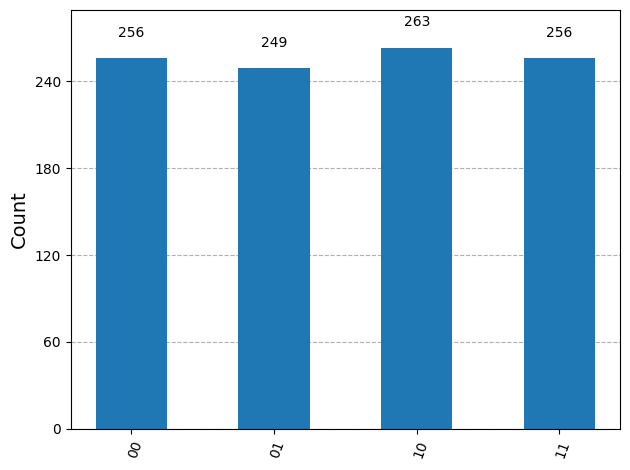

In [23]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The path descriptor is represented by two qubits and is measured  after  applying the function $rules2$. No solution is indicated, why? There are two marked solutions in four states, we cannot apply Grover's amplification! 
The marked solution cannot be bigger than the one fourth of the present states, which is present during a deeper search. 
In our example of four states ond two marked solutions we a guaranted 50% success if we measure. 